- STARTDATE, ENDDATE 분리 후 합치기만 함
- **STARTDATE ~ ENDDATE 사이 날짜 삽입 해야함.**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf

# Data Load && 

In [2]:
lab = pd.read_csv('/data/MIMIC_III/LABEVENTS.csv')
pre = pd.read_csv('/data/MIMIC_III/PRESCRIPTIONS.csv')
pro = pd.read_csv('/data/MIMIC_III/PROCEDUREEVENTS_MV.csv')
폐렴환자 = pd.read_csv('/project/data/폐렴환자lab.csv')

In [3]:
lab['ITEMID'].nunique()
폐렴환자['ITEMID'].nunique()

690

In [4]:
#폐렴환자 id 추출
subid = 폐렴환자['SUBJECT_ID'].unique()
len(subid)

7799

In [5]:
import datetime as dt

#datetime - date만 추출하는 함수 생성

def only_date(time):
    time = pd.to_datetime(time)
    time = time.dt.date
    return time

In [6]:
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [10]:
pre.groupby(['DRUG'])['SUBJECT_ID'].count().sort_values(ascending=False)[:10]

DRUG
Potassium Chloride             192993
Insulin                        143465
D5W                            142241
Furosemide                     133122
0.9% Sodium Chloride           130147
NS                             129731
Magnesium Sulfate               90427
Iso-Osmotic Dextrose            87005
Sodium Chloride 0.9%  Flush     83392
Acetaminophen                   78768
Name: SUBJECT_ID, dtype: int64

In [11]:
pro

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258061,257337,41958,182711,246007.0,2155-08-09 01:51:00,2155-08-10 11:20:00,225204,2009.0,min,Right Antecube,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
258062,257338,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258063,257339,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225459,1.0,None,NaN,...,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258064,257340,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225966,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,1,Rewritten,NaN,RN,2155-08-09 02:20:00


In [94]:
d_diag = pd.read_csv('/project/data/D_ICD_DIAGNOSES.csv') #선행
[d_diag.groupby(['SHORT_TITLE'])['ICD9_CODE'].count().sort_values(ascending = False)[:10]]

[SHORT_TITLE
 Op skl base fx-deep coma    5
 Opn skul fx NEC-brf coma    5
 Cl skl w oth fx-mod coma    5
 Cl skl w oth fx-coma NOS    5
 Cl skl w oth fx-brf coma    5
 Cl skl w oth fx w/o coma    5
 Opn skul/oth fx-coma NOS    5
 Opn skul/oth fx-brf coma    5
 Opn skul/oth fx w/o coma    5
 Cl skl vlt fx-proln coma    5
 Name: ICD9_CODE, dtype: int64]

# LAB2

In [13]:
len(subid)

7799

In [14]:
lab2 = lab[(lab['SUBJECT_ID'].isin(subid))&(lab['FLAG']=='abnormal')].reset_index(drop=True)
lab2 = lab2[['SUBJECT_ID','ITEMID','CHARTTIME']]
lab2['Type'] = 'LAB'

In [15]:
lab2['CHARTTIME'] = only_date(lab2['CHARTTIME'])
lab2 = lab2.rename(columns={'CHARTTIME':'DATE', 'ITEMID':'ITEM'})
lab2 = lab2[['SUBJECT_ID','DATE','ITEM','Type']]

In [16]:
lab2

,SUBJECT_ID,DATE,ITEM,Type
0,9,2149-11-14,50821,LAB
1,9,2149-11-14,50910,LAB
2,9,2149-11-14,50911,LAB
3,9,2149-11-14,50964,LAB
4,9,2149-11-14,50821,LAB
...,...,...,...,...
3406604,96442,2115-06-29,51221,LAB
3406605,96442,2115-06-29,51222,LAB
3406606,96442,2115-06-29,51244,LAB
3406607,96442,2115-06-29,51254,LAB


# PRE2

In [18]:
pre2 = pre[pre['SUBJECT_ID'].isin(subid)].reset_index(drop=True)
pre2 = pre2[['SUBJECT_ID','STARTDATE','ENDDATE','NDC']]

#time drop, yyyy-mm-dd로 변경
pre2['STARTDATE'], pre2['ENDDATE'] = only_date(pre2['STARTDATE']), only_date(pre2['ENDDATE'])

pre2.shape

(1329162, 4)

In [19]:
#enddate가 null인 값은 startdate 삽입
end_null = pre2[(pre2['ENDDATE'].isnull())&(pre2['STARTDATE'].notnull())]
end_null['ENDDATE'] = end_null['STARTDATE']

start_null = pre2[(pre2['STARTDATE'].isnull())&(pre2['ENDDATE'].notnull())]
start_null['STARTDATE'] = start_null['ENDDATE']

pre2.loc[end_null.index] = end_null
pre2.loc[start_null.index] = start_null

In [20]:
#drop null
# pre2 = pre2.drop(pre2[pre2['STARTDATE'].isnull()].index).sort_values(['SUBJECT_ID','STARTDATE']).reset_index(drop=True)
pre2 = pre2.dropna().sort_values(['SUBJECT_ID','STARTDATE']).reset_index(drop=True)

In [22]:
print(pre2.shape)
pre2.isnull().sum()

(1327249, 4)


SUBJECT_ID    0
STARTDATE     0
ENDDATE       0
NDC           0
dtype: int64

In [23]:
from datetime import datetime, timedelta

def date_range(start, end):
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

In [28]:
pre2['STARTDATE'][10], pre2['ENDDATE'][10]

(datetime.date(2149, 11, 9), datetime.date(2149, 11, 11))

In [29]:
date_range(pre2['STARTDATE'][10], pre2['ENDDATE'][10])

['2149-11-09', '2149-11-10', '2149-11-11']

In [42]:
# pre2.to_csv('./pre2.csv', index=False)

In [43]:
# pre_dict={}
# lst_time = []

# with open('./pre2.csv', 'r') as f:
#     line=f.readline()
#     for line in f:
#         sub, start, end, ndc = line[0], line[1], line[2], line[3]
#         d = date_range(pre2['STARTDATE'][i], pre2['ENDDATE'][i])
#         pre2_dic[i] = d

In [44]:
# index에 맞춰서 itemid 넣어주려고 dic 생성, key: index, value: 기간
pre2_dic = {}
for i in range(len(pre2)):
    d = date_range(pre2['STARTDATE'][i], pre2['ENDDATE'][i])
    pre2_dic[i] = d
    
lst_time = []
for i in range(len(pre2)):
    lst_time.extend(pre2_dic[i][:])
    
# pre2 NDC열에 들어갈 lst
lst_itemid = []
for i in range(len(pre2)):
    for j in pre2_dic[i]:
        lst_itemid.append(pre2['NDC'][i])
        
# pre2 subid열에 들어갈 lst
lst_subid = []
for i in range(len(pre2)):
    for j in pre2_dic[i]:
        lst_subid.append(pre2['SUBJECT_ID'][i])

pre2sub = pd.DataFrame(lst_subid)
pre2time = pd.DataFrame(lst_time)
pre2item = pd.DataFrame(lst_itemid)

In [45]:
pre2_completed = pd.concat([pre2sub, pre2time, pre2item], axis = 1)
pre2_completed.columns = ['SUBJECT_ID', 'DATE', 'ITEM']
pre2_completed['Type'] = 'PRE'
pre2_completed

,SUBJECT_ID,DATE,ITEM,Type
0,9,2149-11-09,0.0,PRE
1,9,2149-11-09,85036207.0,PRE
2,9,2149-11-09,456066270.0,PRE
3,9,2149-11-09,456066270.0,PRE
4,9,2149-11-09,338001702.0,PRE
...,...,...,...,...
5650364,99985,2181-02-10,0.0,PRE
5650365,99985,2181-02-11,0.0,PRE
5650366,99985,2181-02-12,0.0,PRE
5650367,99985,2181-02-11,781305714.0,PRE


# PRO2

In [46]:
pro2 = pro[pro['SUBJECT_ID'].isin(subid)].reset_index(drop=True)
pro2 = pro2[['SUBJECT_ID','STARTTIME','ENDTIME','ITEMID']]
pro2['STARTTIME'], pro2['ENDTIME'] = only_date(pro2['STARTTIME']), only_date(pro2['ENDTIME'])

In [47]:
pro2.isnull().sum()

SUBJECT_ID    0
STARTTIME     0
ENDTIME       0
ITEMID        0
dtype: int64

In [48]:
# index에 맞춰서 itemid 넣어주려고 dic 생성, key: index, value: 기간
pro2_dic = {}
for i in range(len(pro2)):
    d = date_range(pro2['STARTTIME'][i], pro2['ENDTIME'][i])
    pro2_dic[i] = d
    
lst_time = []
for i in range(len(pro2)):
    lst_time.extend(pro2_dic[i][:])
    
# pro2 NDC열에 들어갈 lst
lst_itemid = []
for i in range(len(pro2)):
    for j in pro2_dic[i]:
        lst_itemid.append(pro2['ITEMID'][i])
        
# pro2 subid열에 들어갈 lst
lst_subid = []
for i in range(len(pro2)):
    for j in pro2_dic[i]:
        lst_subid.append(pro2['SUBJECT_ID'][i])

pro2sub = pd.DataFrame(lst_subid)
pro2time = pd.DataFrame(lst_time)
pro2item = pd.DataFrame(lst_itemid)

In [49]:
pro2_completed = pd.concat([pro2sub, pro2time, pro2item], axis = 1)
pro2_completed.columns = ['SUBJECT_ID', 'DATE', 'ITEM']
pro2_completed['Type'] = 'PRO'
pro2_completed

,SUBJECT_ID,DATE,ITEM,Type
0,31608,2133-01-10,224385,PRO
1,31608,2133-01-10,225792,PRO
2,31608,2133-01-11,225792,PRO
3,31608,2133-01-12,225792,PRO
4,31608,2133-01-13,225792,PRO
...,...,...,...,...
164937,41958,2155-08-10,225204,PRO
164938,41958,2155-08-09,225402,PRO
164939,41958,2155-08-09,225459,PRO
164940,41958,2155-08-09,225966,PRO


# Merge

In [50]:
lab2.columns, pre2_completed.columns, pro2_completed.columns

(Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'),
 Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'),
 Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'))

In [51]:
len(lab2)+len(pro2)+len(pre2)

4813536

In [52]:
m1 = pd.merge(lab2, pre2_completed, on=['SUBJECT_ID','DATE','ITEM','Type'], how='outer').sort_values(['SUBJECT_ID','DATE'])
total_data = pd.merge(m1, pro2_completed, on=['SUBJECT_ID','DATE','ITEM','Type'], how='outer').sort_values(['SUBJECT_ID','DATE']).reset_index(drop=True)
total_data

,SUBJECT_ID,DATE,ITEM,Type
0,9,2149-11-09,50882.0,LAB
1,9,2149-11-09,50931.0,LAB
2,9,2149-11-09,50971.0,LAB
3,9,2149-11-09,51275.0,LAB
4,9,2149-11-09,51288.0,LAB
...,...,...,...,...
9221915,99985,2181-03-06,51288.0,LAB
9221916,99985,2182-03-14,51279.0,LAB
9221917,99985,2182-03-14,51006.0,LAB
9221918,99985,2182-03-14,51221.0,LAB


In [24]:
total_data['ITEM'].nunique()

4069

In [25]:
total_data['SUBJECT_ID'].nunique()

7799

In [26]:
total_data['ITEM'] = total_data['ITEM'].astype(int)
total_data.to_csv('./data/merge_data.csv',index=False)

# Model

In [54]:
total_data = pd.read_csv('../data/merge_data.csv')

### Label

In [13]:
폐렴환자1 = pd.read_csv('/project/data/폐렴환자.csv')
label = 폐렴환자1[폐렴환자1['SUBJECT_ID'].isin(subid)][['SUBJECT_ID','EXPIRE_FLAG']].sort_values('SUBJECT_ID').reset_index()['EXPIRE_FLAG']

In [74]:
np.save("./data/2030days_label.npy",label)

In [14]:
df.shape

(7799, 4069)

## 시계열

In [62]:
data = pd.read_csv('../data/merge_data.csv')
data = data.set_index('SUBJECT_ID')
label = pd.read_csv("../data/2030days_label.npy")

In [64]:
admission = pd.read_csv('/data/MIMIC_III/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

#final_date
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())

#sub2idx
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i

#item2idx
dic_item2idx = {}
for i,j in enumerate(data['ITEM'].sort_values().unique()):
    dic_item2idx[j] = i

In [62]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  7799
dic_item2idx length :  4069
dic_sub2final_date length :  7799


In [63]:
data.head(1)

,DATE,ITEM,Type
SUBJECT_ID,,,
9,2149-11-09,50882,LAB


In [64]:
dic_item2idx[50883]

35

### 10일치

In [88]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),10,len(dic_item2idx)))
x.shape

IF=open("../data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])
    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 10
#     print(finaldate, date, dateidx)
    if (dateidx < 0) or (dateidx > 9) :
        continue
    else:
#         print(finaldate, date, dateidx)
        x[subidx, dateidx, itemidx] = 1
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2058424433072408 분
2042722.0


In [65]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),10,len(dic_item2idx)))
x.shape

IF=open("./data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 10
    
    if (dateidx < 0) or (dateidx > 9) :
        continue
    else:
#         print(finaldate, date, dateidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.41984949906667074 분
2042722.0


In [66]:
# np.save("./data/10days_data.npy",x)

In [67]:
x.shape

(7799, 10, 4069)

In [68]:
x.shape[0]*0.7

5459.299999999999

In [69]:
# 5460 기준으로 split
i=5460
X_train = x[:i,:,:]
y_train = label[:i]


X_test = x[i:,:,:]
y_test = label[i:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5460, 10, 4069), (1, 5), (2339, 10, 4069), (0, 5))

In [70]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [51]:
# from keras.regularizers import l2

# seed_num = 42
# np.random.seed(seed_num)
# tf.random.set_seed(seed_num)

# lstm = Sequential()
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True,
#          bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, x.shape[2]),
#               bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(Dense(units=1, activation='sigmoid'))
# print(lstm.summary())

In [52]:
# from keras.callbacks import EarlyStopping

# lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
# early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=2000, callbacks=[early_stop])

In [53]:
lstm2 = Sequential()
lstm2.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(x.shape[1], x.shape[2])))
lstm2.add(Dense(units=1, activation='sigmoid'))
print(lstm2.summary())

from keras.callbacks import EarlyStopping

lstm2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop], shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 130496    
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 130,505
Trainable params: 130,505
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
32/32 [==============================] - 13s 29ms/step - loss: 0.6220 - acc: 0.6932 - val_loss: 0.6912 - val_acc: 0.5861
Epoch 2/200
32/32 [==============================] - 0s 12ms/step - loss: 0.5818 - acc: 0.6932 - val_loss: 0.6531 - val_acc: 0.5861
Epoch 3/200
32/32 [==============================] - 0s 13ms/step - loss: 0.5550 - acc: 0.6932 - val_loss: 0.6247 - val_acc: 0.5861
Epoch 4/200
32/32 [==============================] - 0s 12ms/step - loss: 0.5343 - acc: 0.6932 - val_loss: 0.6

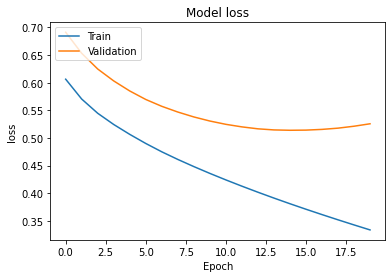

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

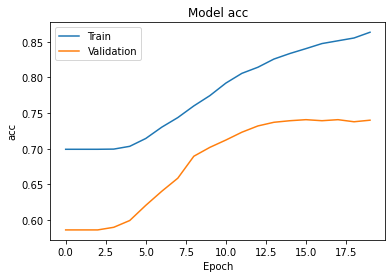

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
pred = lstm2.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [59]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.7079948696023942
